✅ Day 4: **Visualizing Gold Tables**

In [0]:
spark.sql("USE CATALOG databricks_cat")
spark.sql("USE SCHEMA gold")

df_gold =spark.table("daily_country_vaccinations") 

df_gold.display()  


**Basic Visualizations**

📈 Country-wise Total Vaccinations (Latest Month)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

#Convert to Pandas for Visualization
df_pd = df_gold.toPandas(); 
df_pd['date'] = pd.to_datetime(df_pd['date'])

latest_month = df_pd['date'].max().month
latest_year = df_pd['date'].max().year

df_latest_month = df_pd[
    (df_pd['date'].dt.month==latest_month) &
    (df_pd['date'].dt.year==latest_year)
]

# Aggregate total vaccinations per country over the month. Sort descending
df_latest_tot = df_latest_month.groupby('location',as_index=False)['people_vaccinated'].sum().sort_values(by='people_vaccinated',ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(df_latest_tot['location'], df_latest_tot['people_vaccinated'])
plt.xlabel("People Vaccinated (Sum for Latest Month)")
plt.ylabel("Country")
plt.title(f"People Vaccinated by Country (Month: {latest_year}-{latest_month:02d})")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

📊 **Trend Over Time for Top 3 Countries**



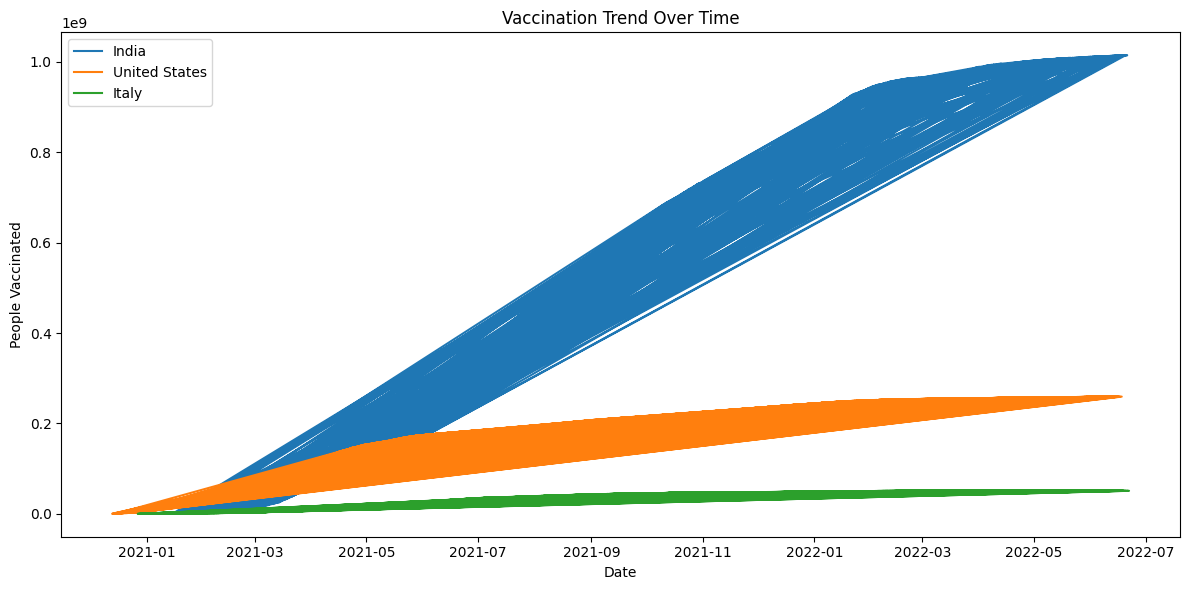

In [0]:
top_countries = df_latest_tot['location'].head(3).tolist()

df_top3 = df_pd[
    (df_pd['location'].isin(top_countries))
]

plt.figure(figsize=(12, 6))
for country in top_countries:
    subset = df_top3[df_top3['location'] == country]
    plt.plot(subset['date'], subset['people_vaccinated'], label=country)

plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.title("Vaccination Trend Over Time")
plt.legend()
plt.tight_layout()
plt.show()
